# CH03

## 파일 설명
| 파일명 | 파일 용도 | 관련 절 | 페이지 |
|:--   |:--      |:--    |:--      |
| mnist_show.py | MNIST 데이터셋을 읽어와 훈련 데이터 중 0번째 이미지를 화면에 출력합니다. | 3.6.1 손글씨 데이터셋 | 99 |
| neuralnet_mnist.py | 신경망으로 손글씨 숫자 그림을 추론합니다. 입력층, 은닉층1, 은닉층2, 출력층의 뉴런 수는 각각 784, 50, 100, 10입니다. | 3.6.2 신경망의 추론 처리 | 100 |
| neuralnet_mnist_batch.py | neuralnet_mnist.py에 배치 처리 기능을 더했습니다. | 3.6.3 배치 처리 | 104 |
| relu.py | ReLU 함수를 구현한 코드입니다. | 3.2.7 ReLU 함수 | 76 |
| sample_weight.pkl | 미리 학습해둔 가종치 매개변수의 값들입니다. | 3.6.2 신경망의 추론 처리 | 100 |
| sig_step_compare.py | 시그모이드 함수와 계단 함수의 그래프 모양을 비교해봅니다. | 3.2.5 시그모이드 함수와 계단 함수 비교 | 74 |
| sigmoid.py | 시그모이드 함수를 구현한 코드입니다. | 3.2.4 시그모이드 함수 구현하기 | 72 |
| step_function.py | 계단 함수를 구현한 코드입니다. | 3.2.3 계단 함수의 그래프 | 70 |

## 3.1 퍼셉트론에서 신경망으로
* 활성화 함수의 등장: 입력 신호의 총합을 출력 신호로 변환하는 함수

## 3.2 활성화 함수

In [1]:
# 3.2.2 계단 함수 구현하기

def step_function(x): # 단일 실수만 입력 가능
    if x > 0:
        return 1
    else:
        return 0

# 입력으로 단일 변수(실수형)에 넘파이 배열도 사용할 수 있도록 수정

def step_function(x): # 단일 실수 및 넘파이 배열 인수로 사용 가능
    y = x > 0
    return y.astype(np.int) # astype(): True:1, False: 0으로 변환

In [2]:
# 3.2.3 계단 함수의 그래프

import numpy as np
import matplotlib.pylab as plt

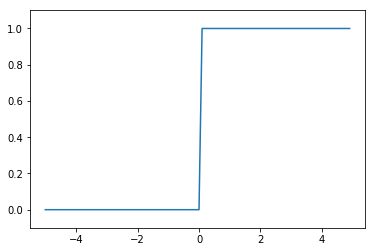

In [3]:
def step_function(x):
    return np.array(x > 0, dtype=np.int) # 위의 함수보다 더 간단하게

# (응용) 더 간단하게!
step_function = lambda x: (x > 0).astype(np.int)

x = np.arange(-5.0, 5.0, 0.1) # -5에서 5까지 0.1 간격으로 넘파이 배열 생성
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

In [4]:
# 3.2.4 시그모이드 함수 구현하기

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x)) # 시그모이드 출력 확인

[0.26894142 0.73105858 0.88079708]


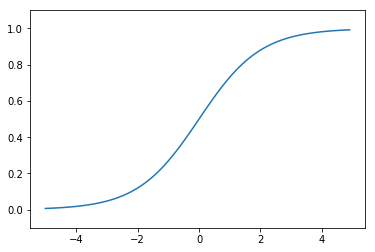

In [5]:
# 시그모이드 그래프
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

In [6]:
# 3.2.5 시그모이드 함수와 계단 함수 비교
!cat ../src/ch03/sig_step_compare.py

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()


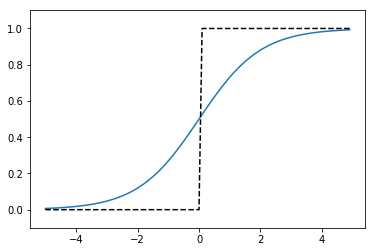

In [7]:
# 교재 내용 직접 구현 (각 함수 정의는 이미 위에서 정의한 걸 사용)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--') # 계단 함수는 검정색(k) 점선으로
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

* 시그모이드 vs 계단 함수
 - 차이점 (시그모이드 기준): 매끄러움, 실수값 반환
 - 계단 : 시그모이드 = 시시오도시 : 물레방아
 - 공통점: 입력이 작으면 출력이 0에 가깝고, 입력이 커지면 출력이 1에 가까워지는 구조. 입력이 아무리  작거나 커도 출력은 0에서 1사이
 
 - 중요한 공통점: 비선형 함수! 선형 함수로 만들면 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로 똑같은 기능을 할 수 있어 여러 층으로 구성하는 이점을 살릴 수 없음

In [8]:
# 3.2.7 ReLU 함수 (Rectified Linear Unit; 렐루)

def relu(x): # 입력이 0을 넘으면 입력 그대로, 0 이하이면 0을 출력
    return np.maximum(0, x)

## 3.3 다차원 배열의 계산

In [9]:
# 3.3.1 다차원 배열
import numpy as np
A = np.array([1, 2, 3, 4]) # 1차원 배열 생성
print(A)

print(np.ndim(A)) # 배열의 차원수는 1
print(A.shape) # 배열의 형상 확인 (1차원이므로 값이 1개인 튜플을 반환함)
print(A.shape[0]) # 1차원째 배열의 크기 확인: 4

[1 2 3 4]
1
(4,)
4


In [10]:
# 2차원 배열
B = np.array([[1,2], [3,4], [5,6]])
print(B)

print(np.ndim(B)) # 2차원이므로 2
print(B.shape) # B의 형상은 (3행,2열) 

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [12]:
# 3.3.2 행렬의 곱: np.dot 활용

A = np.array([[1,2], [3,4]])
print(A.shape) # (2,2)
B = np.array([[5,6], [7,8]])
print(B.shape) # (2,2)

print(np.dot(A,B)) # 행렬의 곱 A * B 계산, matmul

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [13]:
# 행렬 곱의 다른 예: 2x3 행렬과 3x2 행렬의 곱
A = np.array([[1,2,3], [4,5,6]])
print(A.shape) # (2,3)

B = np.array([[1,2], [3,4], [5,6]])
print(A.shape) # (3,2)

print(np.dot(A, B))

(2, 3)
(2, 3)
[[22 28]
 [49 64]]


In [14]:
# 행렬 곱 조건이 안 맞아 에러나는 경우
C = np.array([[1,2], [3,4]])
print(C.shape) # (2,3)
print(A.shape) # (2,3)
print(np.dot(A, C))

(2, 2)
(2, 3)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [15]:
# A가 2차원, B가 1차원일때도 '대응하는 차원의 원소 수를 일치시켜라'
A = np.array([[1,2], [3,4], [5,6]])
print(A.shape) # (3,2)
B = np.array([7,8])
print(B.shape) # (2,)
print(np.dot(A,B))

(3, 2)
(2,)
[23 53 83]


In [16]:
# (응용) 벡터를 앞쪽에 붙이면 자동적으로 열벡터(세로방향)으로 간주하고 계산하는듯
C = np.array([7,8,9])
print(np.dot(C,A)) # 행렬 x (3,2)
print(np.matmul(C,A))

[ 76 100]
[ 76 100]


In [17]:
# 3.3.3 신경망에서의 행렬 곱: 행렬의 곱으로 신경망의 계산 수행 가능
X = np.array([1, 2])
print(X.shape) # (2,)
W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape) # (2,3)
Y = np.dot(X, W) # 신경망 가중치 곱을 한꺼번에 계산
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3층 신경망 구현하기
* 신경망에서의 계산을 행렬 계산으로 정리
* 표기법
 - $W_{12}^{(1)}$: (1): 1층의 가중치, 아래첨자 처음 - 다음층의 1번째 뉴런, 두번째 - 앞 층의 2번째 뉴런

In [20]:
# 3.4.2 각 층의 신호 전달 구현하기 - 넘파이의 다차원 배열을 사용해서 구현

# 입력층 -> 1층
X = np.array([1.0, 0.5]) # 입력 (원소가 2개)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # 1층 가중치 (2x3 행렬) 
B1 = np.array([0.1, 0.2, 0.3]) # 1층 편향(bias) (1층 3개 원소에 대응)

print(W1.shape) # (2,3)
print(X.shape) # (2,)
print(B.shape) # (3,)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(2,)


In [21]:
# 시그모이드를 활성화 함수로 사용
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [22]:
# 1층 -> 2층
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) # (3,)
print(W2.shape) # (3,2)
print(B2.shape) # (2,)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [23]:
# 2층 -> 출력층

# 활성화 함수를 항등 함수로 사용
# 출력층의 활서화 함수는 풀고자 하는 문제의 성질에 맞게 정의 (예: 회귀 - 항등함수, 2클래스 분류 - 시그모이드, 다중 클래스 분류 - 소프트맥스)

def identify_function(x):
    return x

W3 = np.array([[0.1,0.3], [0.2,0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2,W3) + B3
Y = identify_function(A3) # Y = A3 과 같음

In [26]:
# 3.4.3 구현 정리

# 위의 실행 내용들을 함수들로 정리
# 신경망 구현의 관례에 따라 가중치만 대문자, 편향 및 중간 결과는 소문자로

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1,0.3], [0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    
    return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y) # [0.317, 0.696]

[0.31682708 0.69627909]


# 3.5 출력층 설계하기

In [27]:
# 3.5.1 항등 함수와 소프트맥스 함수 구현하기

# 소프트맥스 계산 과정 진행
a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a) # 지수 함수
print(exp_a) # [1.35, 18.17, 54.60]

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a) # 74.122

y = exp_a / sum_exp_a
print(y) # [0.018, 0.2452, 0.7366]

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [29]:
# 소프트맥스 함수로 구현 (잠재 결함이 있음)
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [32]:
# 3.5.2 소프트맥스 함수 구현시 주의점: 지수 함수 적용시 오버플로 가능성
# -> 입력신호 중 최대값으로 모든 값을 빼도 계산상 결과는 동일하고 오버플로 이슈도 해결

a = np.array([1010, 1000, 990])
print(softmax(a)) # 오버플로 대책 적용 전

[nan nan nan]


/Users/a60029864/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [34]:
# 오버플로 대책 적용한 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

print(softmax(a)) # 오버플로 이슈 해결되어 예상했던 값 계산됨

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [36]:
# 3.5.3 소프트맥스 함수의 특징

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y) # 각 출력값은 0에서 1 사이 실수
print(np.sum(y)) # 소프트맥스 함수 출력의 총합은 1

# 소프트맥스 함수 적용해도 원소의 대소 관계는 변하지 않음
# -> 일반적으로 출력층의 소프트맥스 함수는 지수함수 계산 자원 낭비 절약을 위해 생략한다고 함

[0.01821127 0.24519181 0.73659691]
1.0


In [37]:
# 3.5.4 출력층의 뉴런 수 - 풀리는 문제에 맞게 - 분류에서는 분류하고 싶은 클래스 수로 설정하는게 일반적

# 3.6 손글씨 숫자 인식
* 미리 학습된 매개변수를 사용하여 추론 과정 - 순전파 (forward propagation) - 만 구현 (학습 과정은 생략)

### 3.6.1 MNIST 데이터셋

* 훈련 이미지 60,000장, 시험 이미지 10,000장
* 28x28 회색조 이미지 (0~255)

* MNIST 데이터셋 관련된 함수는 예제 소스에 있는 dataset/mnist.py 파일을 import해서 사용

In [42]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉토리의 파일 가져올 수 잇도록 설정
from src.dataset.mnist import load_mnist # 예제 소스 디렉토리 구조에 맞게 변경

# 처음 한 번은 몇 분 정도 걸린다고 함 => 예제 소스에 .pkl 파일이 있어서 바로 로드 가능
# 함수 내 인수 설명:
# noramlize: 입력이미지의 픽셀값을 0~1사이값으로 정규화할지 (False이면 0~255 사이값 유지)
# flatten: 입력이미지를 1차원 배열로 (평탄하게) 만들지 여부
# one_hot_label: 레이블을 one-hot encoding 형태로 저장할지 여부
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape) # (60000,784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000,784)
print(t_test.shape) # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


5
(784,)
(28, 28)


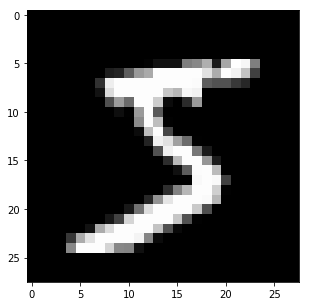

In [85]:
# MNIST 화면으로 읽기
# 원래 소스는 .py 단위로 나뉘어져 각각 load_mnist 등 기능을 작성해야 하지만,
# Jupyter Notebook에서는 이미 위에서 실행한 내용이므로 중복 부분은 생략

from PIL import Image

def img_show(img, show_option=1):
    pil_img = Image.fromarray(np.uint8(img))
    figsize(10, 10)
    if show_option==1:
        # 팝업 윈도우로 띄움. 교재에 나온 방식
        pil_img.show()
    elif show_option==2:
        # Jupyter Notebook에 표시. 크기 조정이 어려움
        display(pil_img)
    elif show_option==3:
        # matplotlib imshow 사용. 크기 조정이 가능
        plt.figure(figsize=(5,5))
        plt.imshow(pil_img)
        plt.show()
    
img = x_train[0]
label = t_train[0]
print(label) # 5

print(img.shape) # (784,) <- 28x28 image가 flatten 처리됨
img = img.reshape(28, 28) # 원래 이미지로 변환
print(img.shape) # (28,28)

img_show(img, show_option=1)
img_show(img, show_option=2)
img_show(img, show_option=3)

In [75]:
# 3.6.2 신경망의 추론 처리

# 추론 작업을 처리해줄 함수 정의
import pickle

def get_data():
    # 이미지 불러올때 normalize=True 설정 => 전처리로 정규화 수행한 효과
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    # 예제 소스 위치에 맞춰 파일경로 변경
    with open("../src/ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [76]:
# 테스트셋 각각에 대해 추론 수행 후 정확도 측정

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [78]:
# 3.6.3 배치 처리

# 앞서 구현한 신경망 각 층의 가중치 형상 출력
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape) # (10000,784)

print()

print(x[0].shape) # (784,)
print(W1.shape) # (784,50)
print(W2.shape) # (50,100)
print(W3.shape) # (100,10)

# 신경망 각 층의 배열 형상의 추이에서 각 이전 열과 다음 행의 원소 수가 일치하는 것을 확인

(10000, 784)

(784,)
(784, 50)
(50, 100)
(100, 10)


In [80]:
# 입력 x의 형상을 (784,)에서 (N x 784)로 바꿔 N장 분량의 데이터를 하나의 입력으로 표현해도
# 출력 데이터의 형상은 (N x 100)이 되어 N장 분량 입력데이터의 결과가 한번에 출력됨

# ==> 이렇게 하나로 묶은 입력 데이터를 배치(batch)라고 함
# NOTE: 배치 처리의 이점
# 1. 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 고도로 최적화되어 있음
# 2. 배치 처리를 통해 느린 I/O로 데이터를 읽는 횟수를 줄여 빠른 CPU/GPU로 순수 계산 수행하는 비율을 높여줌

# 배치 처리 구현

x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size): # i를 batch_size만큼 증가시켜가면서
    x_batch = x[i:i+batch_size] 
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 100x10 배열에서 1번째 차원(가로 또는 열 방향) 구성 원소 중에 최대값 인덱스 찾기
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # 실제 답(t)의 해당 배치 부분의 정답과 넘파이배열끼리 비교해서 True가 몇개인지 세기
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)) + " (%d/%d)" % (accuracy_cnt, len(x)))

Accuracy:0.9352 (9352/10000)


In [81]:
# range()함수 이해용
print(list(range(0, 10)))
print(list(range(0, 10, 3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


In [83]:
# np.argmax() 이해용
x = np.array([[0.1,0.8,0.1],
              [0.3,0.1,0.6],
              [0.2,0.5,0.3],
              [0.8,0.1,0.1]
             ])
y = np.argmax(x, axis=1)
print(y)

[1 2 1 0]


In [84]:
# 넘파이배열 == 연산자 적용 이해
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y==t)
np.sum(y==t)

[ True  True False  True]


3

## 3.7 정리
* 3장: 신경망의 순전파 이해
* 앞 장의 퍼셉트론 대비 활성화 함수에서 차이 => 이 차이가 신경망 학습에 중요. (다음 장에서 공부하자)